# IMAGE RESIZING WITH NEAREST NEIGHBOUR



Importing required packages

In [ ]:
import matplotlib.pyplot as pl #for images reading and handling
import numpy as np # for data handling

Reading image using matplotlib.pyplot

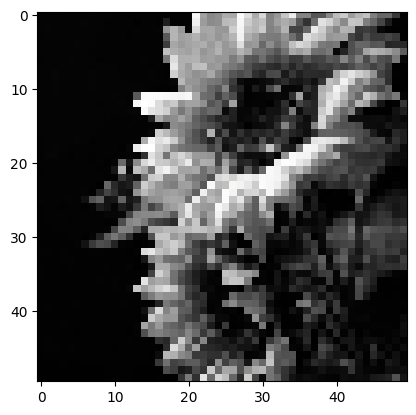

(50, 50, 3)

In [ ]:
image = pl.imread('flower_50.jpg') # Reading image from the file
pl.imshow(image) # Displaying the image
pl.show() # Display the image
image.shape # Printing the shape of the image

Making the image into 2D for easier processing

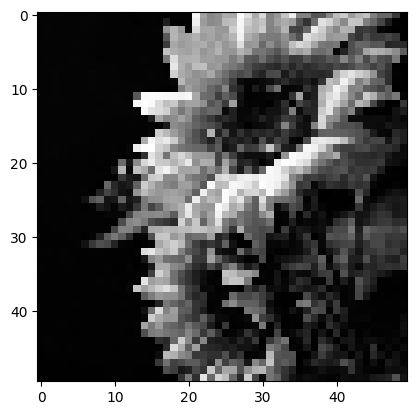

4 4 5 4 4 4 4 5 4 4 3 3 2 3 3 3 3 3 3 3 3 247 162 136 143 172 170 251 223 172 217 131 151 197 237 132 132 85 88 136 189 203 157 181 194 128 102 103 56 0 
4 4 4 4 4 4 5 4 4 3 3 3 3 1 3 3 2 30 2 2 3 239 156 139 143 186 190 247 204 183 194 133 159 172 157 84 50 108 225 210 175 138 199 195 126 103 69 28 2 1 
4 5 4 4 4 4 4 4 4 3 3 3 3 3 3 3 4 149 180 151 5 217 166 167 152 150 205 245 191 181 203 130 140 179 67 66 104 234 206 161 135 179 174 55 61 52 8 1 1 1 
3 4 4 4 4 4 4 4 3 3 3 3 2 3 3 3 3 90 181 160 164 178 157 165 150 161 181 242 174 158 129 123 121 145 110 80 222 205 194 150 156 158 68 50 79 57 58 69 57 1 
4 4 4 4 4 5 4 4 3 3 3 3 3 3 3 3 3 60 167 155 163 169 174 155 173 151 165 222 149 154 105 141 113 135 191 216 204 165 122 115 120 10 79 103 101 84 88 37 40 42 
4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 192 174 166 161 174 150 160 178 152 150 181 163 116 118 103 85 114 168 156 171 112 108 121 8 36 79 93 163 179 171 160 140 94 
3 4 4 4 5 4 4 4 2 3 3 3 3 3 4 3 3 121 220 174 175 178 157 160 151 1

In [ ]:
new_image = image[:,:,0] # Extracting the red channel from the image
pl.imshow(new_image, cmap='gray') # Displaying the new image
pl.show()
new_image.shape  # Printing the shape of the new image

#Printing the image matrix
for i in range (new_image.shape[0]):
  for j in range (new_image.shape[1]):
    print(int(new_image[i,j]),end =' ')
  print()

Nearnest Neighbor Method

In [ ]:
def nearest_neighbor(matrix, size):
  if size == isinstance(size, float):
    size = round(size)
  if size < 0 :
    size = abs(size)
    temp_image = np.full((int(matrix.shape[0]/size),int(matrix.shape[1]/size)), -1)
    # Iterate over the original matrix
    for i in range (int(matrix.shape[0]/size)):
      for j in range (int(matrix.shape[1]/size)):
        # Copy the values from the original matrix to the new matrix
        temp_image[i,j] = matrix[i*size,j*size]
  else:
    # Create a new matrix with the desired size, filled with -1
    temp_image = np.full((matrix.shape[0]*size,matrix.shape[1]*size), -1)
    # Iterate over the original matrix
    for i in range (matrix.shape[0]):
      for j in range (matrix.shape[1]):
        # Copy the values from the original matrix to the new matrix
        temp_image[i*size,j*size] = matrix[i,j]
    # Iterate over the new matrix
    for i in range (temp_image.shape[0]):
      for j in range (temp_image.shape[1]):
        # Check if the current value is -1
        if temp_image[i,j] == -1:
          # Calculate the corresponding coordinates in the original matrix
          x = round(i/size)
          y = round(j/size)
          if x >= matrix.shape[0]:
            x = matrix.shape[0]-1
          if y >= matrix.shape[1]:
            y = matrix.shape[1]-1
          temp_image[i,j] = matrix[x,y]
  return temp_image # return resized image

Optimizing GPU

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


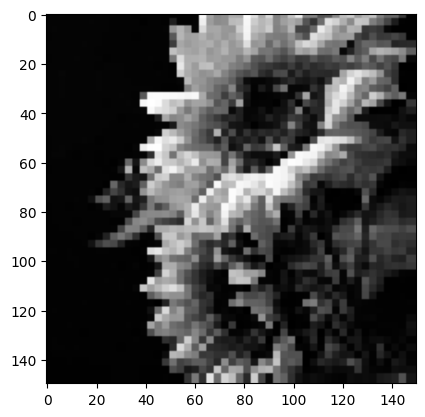

(150, 150)

In [ ]:
with tf.device(device_name):
  temp_image = nearest_neighbor(new_image, 3)
pl.imshow(temp_image, cmap='gray')
pl.show()
temp_image.shape

In [ ]:
for i in range (temp_image.shape[0]):
  for j in range (temp_image.shape[1]):
    print(int(temp_image[i,j]),end =' ')
  print()

4 4 4 4 4 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 4 4 4 4 4 4 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 247 247 247 162 162 162 136 136 136 143 143 143 172 172 172 170 170 170 251 251 251 223 223 223 172 172 172 217 217 217 131 131 131 151 151 151 197 197 197 237 237 237 132 132 132 132 132 132 85 85 85 88 88 88 136 136 136 189 189 189 203 203 203 157 157 157 181 181 181 194 194 194 128 128 128 102 102 102 103 103 103 56 56 56 0 0 0 0 
4 4 4 4 4 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 4 4 4 4 4 4 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 247 247 247 162 162 162 136 136 136 143 143 143 172 172 172 170 170 170 251 251 251 223 223 223 172 172 172 217 217 217 131 131 131 151 151 151 197 197 197 237 237 237 132 132 132 132 132 132 85 85 85 88 88 88 136 136 136 189 189 189 203 203 203 157 157 157 181 181 181 194 194 194 128 128 128 102 102 102 103 103 103 56 56 56 0 0 0 0 
4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 1 1 

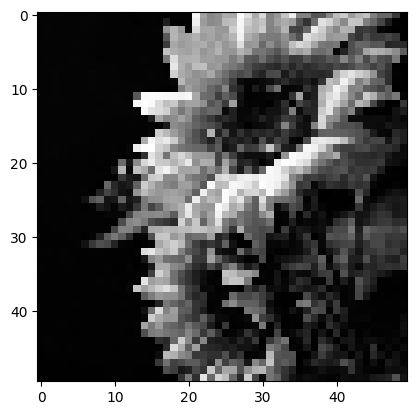

(50, 50)

In [ ]:
with tf.device(device_name):
  new_temp_image = nearest_neighbor(temp_image, -3)
pl.imshow(new_temp_image, cmap='gray')
pl.show()
new_temp_image.shape

In [ ]:
for i in range (new_temp_image.shape[0]):
  for j in range (new_temp_image.shape[1]):
    print(int(new_temp_image[i,j]),end =' ')
  print()

4 4 5 4 4 4 4 5 4 4 3 3 2 3 3 3 3 3 3 3 3 247 162 136 143 172 170 251 223 172 217 131 151 197 237 132 132 85 88 136 189 203 157 181 194 128 102 103 56 0 
4 4 4 4 4 4 5 4 4 3 3 3 3 1 3 3 2 30 2 2 3 239 156 139 143 186 190 247 204 183 194 133 159 172 157 84 50 108 225 210 175 138 199 195 126 103 69 28 2 1 
4 5 4 4 4 4 4 4 4 3 3 3 3 3 3 3 4 149 180 151 5 217 166 167 152 150 205 245 191 181 203 130 140 179 67 66 104 234 206 161 135 179 174 55 61 52 8 1 1 1 
3 4 4 4 4 4 4 4 3 3 3 3 2 3 3 3 3 90 181 160 164 178 157 165 150 161 181 242 174 158 129 123 121 145 110 80 222 205 194 150 156 158 68 50 79 57 58 69 57 1 
4 4 4 4 4 5 4 4 3 3 3 3 3 3 3 3 3 60 167 155 163 169 174 155 173 151 165 222 149 154 105 141 113 135 191 216 204 165 122 115 120 10 79 103 101 84 88 37 40 42 
4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 192 174 166 161 174 150 160 178 152 150 181 163 116 118 103 85 114 168 156 171 112 108 121 8 36 79 93 163 179 171 160 140 94 
3 4 4 4 5 4 4 4 2 3 3 3 3 3 4 3 3 121 220 174 175 178 157 160 151 1

# **Using test Matrix :::**

In [ ]:
test_array = np.array([[1, 2, 3], [4,5,6], [7,8,9]])
print(test_array)
test_array.shape

[[1 2 3]
 [4 5 6]
 [7 8 9]]


(3, 3)

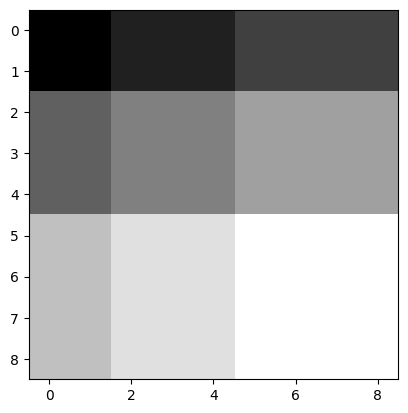

(9, 9)

In [ ]:
with tf.device(device_name):
  temp_image = nearest_neighbor(test_array, 3)
pl.imshow(temp_image, cmap='gray')
pl.show()
temp_image.shape

In [ ]:
for i in range (temp_image.shape[0]):
  for j in range (temp_image.shape[1]):
    print(int(temp_image[i,j]),end =' ')
  print()

1 1 2 2 2 3 3 3 3 
1 1 2 2 2 3 3 3 3 
4 4 5 5 5 6 6 6 6 
4 4 5 5 5 6 6 6 6 
4 4 5 5 5 6 6 6 6 
7 7 8 8 8 9 9 9 9 
7 7 8 8 8 9 9 9 9 
7 7 8 8 8 9 9 9 9 
7 7 8 8 8 9 9 9 9 


In [ ]:
with tf.device(device_name):
  reverse_image = nearest_neighbor(temp_image, -3)
pl.imshow(reverse_image, cmap='gray')
pl.show()
reverse_image.shape

In [ ]:
for i in range (reverse_image.shape[0]):
  for j in range (reverse_image.shape[1]):
    print(int(reverse_image[i,j]),end =' ')
  print()

1 2 3 
4 5 6 
7 8 9 
